### 유튜브 랭킹 사이트 크롤링

In [3]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
from tqdm import tqdm_notebook

In [5]:
import requests
url = 'https://www.utoo.be/u2b/'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
req = requests.get(url, headers=header)
html = req.text
soup = BeautifulSoup(html, 'html.parser')

In [7]:
table = soup.select_one('.youtuberd-wrapper__table')
bodys = table.select('.body')

In [9]:
spans = bodys[0].select('span')
spans[3].get_text()

'135억4224만'

In [ ]:
bodys[0].select_one('a').get_text()

In [94]:
ranks = []; c_names = []; categorys=[]; subs=[]; v_counts=[]

for i in tqdm_notebook(range(2)):
    base_url = 'https://www.utoo.be/u2b/index.php?fg_no=&st=&sv=&sort=subs&page='
    page_url = str(i+1)
    web_url = base_url + page_url
    with urllib.request.urlopen(web_url) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
        table = soup.select_one('.youtuberd-wrapper__table')
        bodys = table.select('.body')
        for body in bodys:
            spans = body.select('span')
            
            ranks.append(spans[0].get_text().strip())
            c_names.append(body.select_one('a').get_text().strip())
            categorys.append(spans[1].get_text()[1:].strip())
            v_counts.append(int(spans[3].get_text().strip().replace('만', '').replace('억', '')))
            subs.append(int(spans[2].get_text().strip().replace('만', '')))

In [95]:
youtube_rank = pd.DataFrame({
    '랭킹' : ranks,
    '채널명' : c_names,
    '카테고리' : categorys,
    '구독자수(단위:만)' : subs,
    '조회수(단위:만)': v_counts
})
youtube_rank = youtube_rank.set_index('랭킹')
youtube_rank

,채널명,카테고리,구독자수(단위:만),조회수(단위:만)
랭킹,,,,
1,BLACKPINK,음악,5320,1354224
2,Big Hit Labels,엔터테인먼트,4690,1273943
3,BANGTANTV,음악,4030,578864
4,Boram Tube Vlog [보람튜브 브이로그],키즈,2710,1149693
5,SMTOWN,엔터테인먼트,2490,1847283
...,...,...,...,...
96,WINNER,음악,346,103018
97,Lime Tube[라임튜브],키즈,345,235311
98,로미유 스토리[Romiyu Story],키즈,343,85587


In [96]:
youtube_rank.to_csv('youtube ranking.csv', encoding='utf8', sep=',')

In [80]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [97]:
df = pd.read_csv('youtube ranking.csv')
df.head()

,랭킹,채널명,카테고리,구독자수(단위:만),조회수(단위:만)
0,1,BLACKPINK,음악,5320,1354224
1,2,Big Hit Labels,엔터테인먼트,4690,1273943
2,3,BANGTANTV,음악,4030,578864
3,4,Boram Tube Vlog [보람튜브 브이로그],키즈,2710,1149693
4,5,SMTOWN,엔터테인먼트,2490,1847283


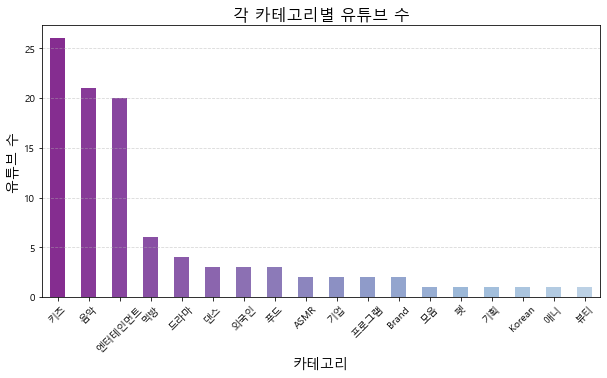

In [296]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)

df_category = df.카테고리.value_counts()
df_category.plot.bar(rot=0, color=plt.get_cmap('BuPu')(np.linspace(0.8, 0.2, 20)))
plt.title("각 카테고리별 유튜브 수", fontsize=16)
plt.xlabel("카테고리", fontsize=14)
plt.ylabel("유튜브 수", fontsize=14)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.show()

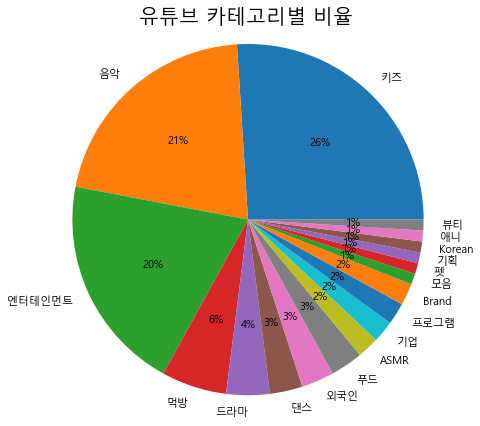

In [288]:
df_category = df.카테고리.value_counts()
plot_pie = df_category.plot.pie(figsize=(7,7), autopct='%1.0f%%', fontsize=11)
plt.title("유튜브 카테고리별 비율", fontsize=20)
plt.axis('equal')
plot_pie.set_ylabel('')
plt.show()

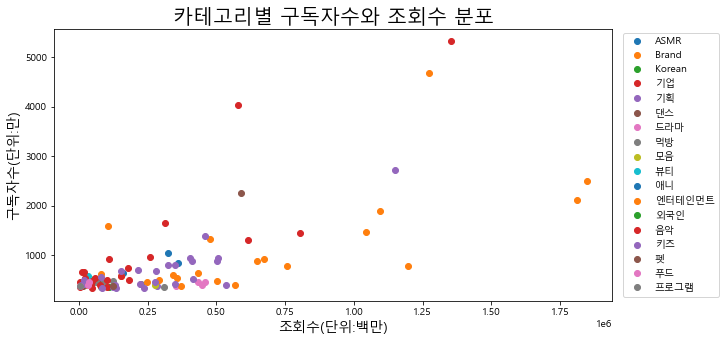

In [277]:
groups = df.groupby('카테고리')

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
for name, group in groups:
    ax.plot(group['조회수(단위:만)'], 
            group['구독자수(단위:만)'], 
            marker='o', 
            linestyle='',
            label=name)
            
ax.legend(ncol=1, loc='center right',	bbox_to_anchor=(1.2,0.5), scatterpoints=1 )
plt.title('카테고리별 구독자수와 조회수 분포', fontsize=20)
plt.xlabel('조회수(단위:백만)', fontsize=14)
plt.ylabel('구독자수(단위:만)', fontsize=14)
plt.show()